In [21]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import linear_model, tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split 
import seaborn as sns
%matplotlib inline
from random import randint, choice, choices

In [24]:
df = pd.read_csv("titanic.csv")
survivors_pclass = df[df["Survived"] == 1].groupby(by="Pclass")["Name"].count()
dead_pclass = df[df["Survived"] == 0].groupby(by="Pclass")["Name"].count()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


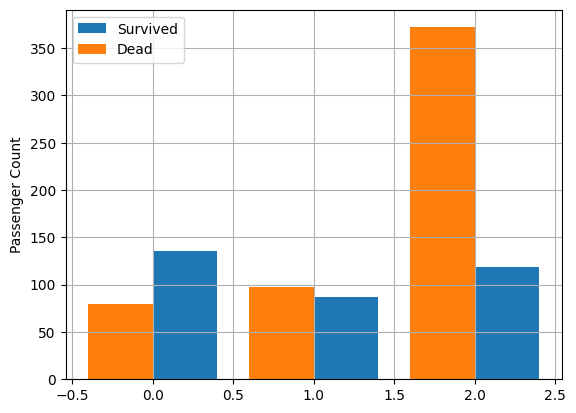

In [25]:
X_axis = np.arange(3)
plt.bar(X_axis + 0.2, survivors_pclass, 0.4, label="Survived")
plt.bar(X_axis - 0.2 , dead_pclass, 0.4, label="Dead")
plt.ylabel("Passenger Count")
plt.legend()
plt.grid()
plt.show()

In [27]:
model_df = df.drop(["Name", "PassengerId", "SibSp", "Parch", "Ticket" , "Survived", "Cabin", "Embarked"], axis=1)
model_df

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [28]:
le_sex = LabelEncoder()

In [32]:
model_df["sex_le"] = le_sex.fit_transform(model_df["Sex"])
model_df.drop("Sex", axis=1, inplace=True)
model_df

,Pclass,Age,Fare,sex_le
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [38]:
x_train, x_test , y_train , y_test = train_test_split(model_df, df["Survived"], train_size=0.7)

In [39]:
model =  tree.DecisionTreeClassifier()


In [41]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
model.score(x_test, y_test)

0.7798507462686567